Importing necessary libraries

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [66]:
print(os.listdir())

['Amazon Sale Report.csv', 'Amazon_sales_report.ipynb', 'output.png', 'Processed_Amazon_Sale_Report.csv']


Loading Data

In [83]:
data = pd.read_csv('https://raw.githubusercontent.com/kshitismita/Amazon_Sales_Report/refs/heads/main/Amazon_Sale_Report_Raw_Data.csv')
print(data.head())

   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   ...  currency  Amount    ship-city   ship-state ship-postal-code  \
0  ...       IN

Visualization: Sales Trend Over Time

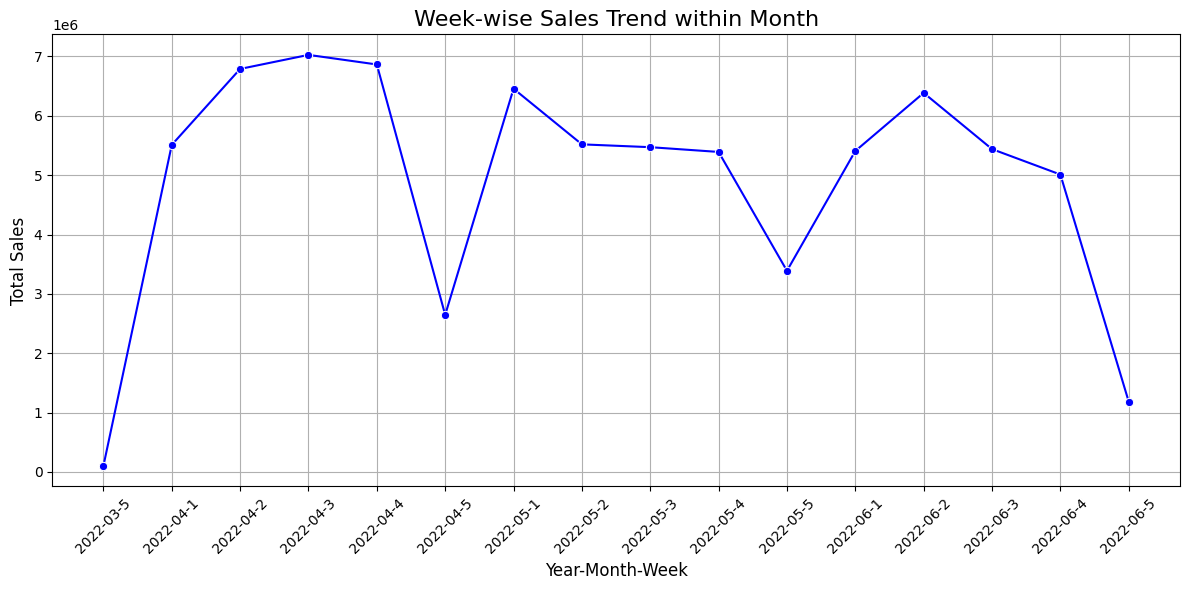

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure the 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract the year, month from the 'Date' column
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Calculate the week of the month manually
data['Week_of_Month'] = data['Date'].dt.day // 7 + 1

# Create a 'Year-Month-Week' column for grouping
data['Year-Month-Week'] = data['Date'].dt.to_period('M').astype(str) + '-' + data['Week_of_Month'].astype(str)

# Group by 'Year-Month-Week' and sum the sales
sales_trend_by_week_of_month = data.groupby('Year-Month-Week')['Amount'].sum()

# Plot the sales trend by Week of Month
plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_trend_by_week_of_month.index, y=sales_trend_by_week_of_month.values, marker="o", color="blue")
plt.title("Week-wise Sales Trend within Month", fontsize=16)
plt.xlabel("Year-Month-Week", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the labels for better readability
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()


Distribution of Amount and Qty

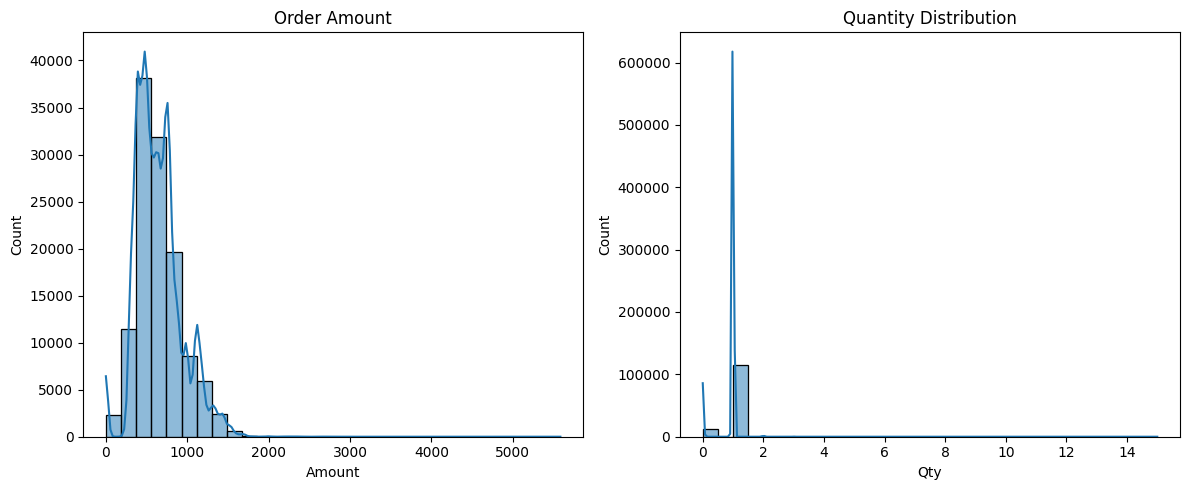

In [95]:
# Distribution plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data['Amount'], bins=30, kde=True, ax=axes[0]).set_title('Order Amount')
sns.histplot(data['Qty'], bins=30, kde=True, ax=axes[1]).set_title('Quantity Distribution')
plt.tight_layout()
plt.show()


 Product Analysis

C:\Users\kshit\AppData\Local\Temp\ipykernel_15560\391457408.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis", errorbar=None)


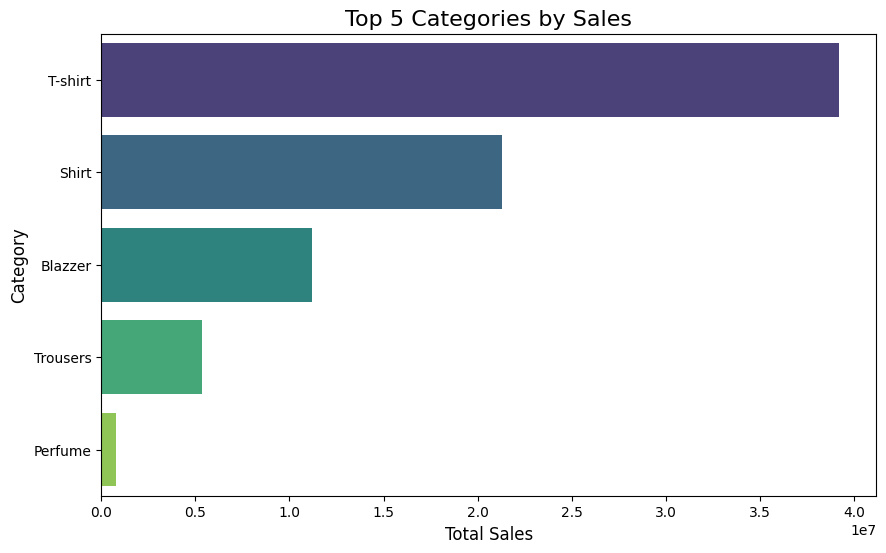

C:\Users\kshit\AppData\Local\Temp\ipykernel_15560\391457408.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm", errorbar=None)


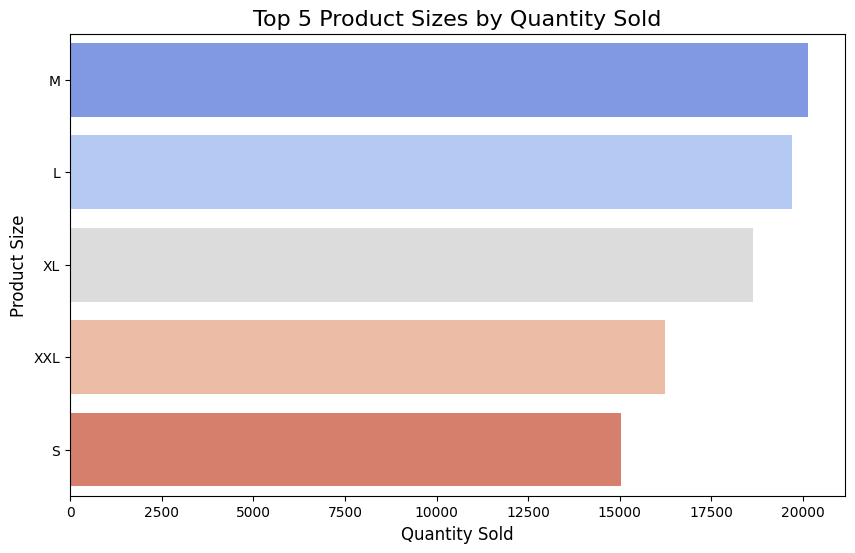

In [96]:
# Top 5 categories by sales
top_categories = data.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(5)

# Plot categories
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis", errorbar=None)
plt.title("Top 5 Categories by Sales", fontsize=16)
plt.xlabel("Total Sales", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.show()

# Top 5 products by quantity
top_products = data.groupby('Size')['Qty'].sum().sort_values(ascending=False).head(5)

# Plot product sizes
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm", errorbar=None)
plt.title("Top 5 Product Sizes by Quantity Sold", fontsize=16)
plt.xlabel("Quantity Sold", fontsize=12)
plt.ylabel("Product Size", fontsize=12)
plt.show()




 Fulfillment Analysis

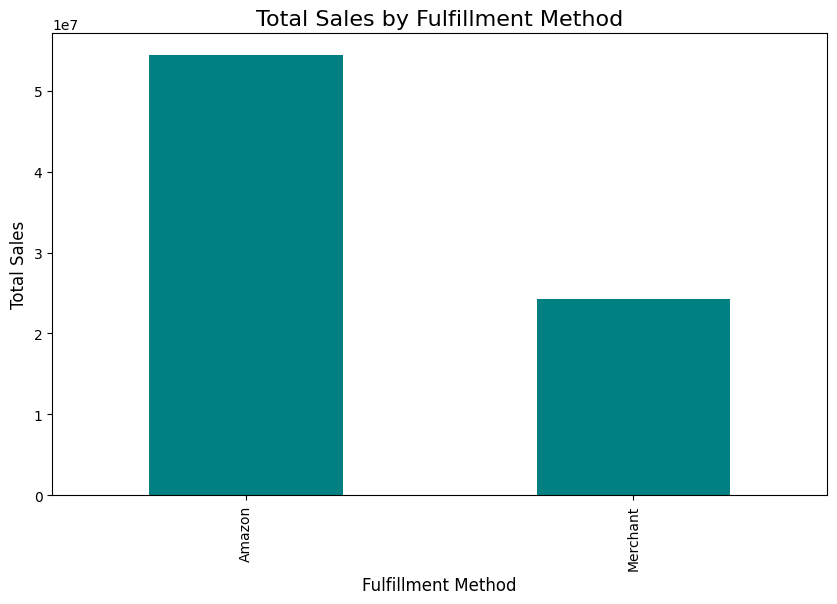

In [98]:
# Fulfillment method sales
fulfillment_analysis = data.groupby('Fulfilment')['Amount'].sum()

# Plot fulfillment methods
plt.figure(figsize=(10, 6))
fulfillment_analysis.plot(kind='bar', color='teal')
plt.title("Total Sales by Fulfillment Method", fontsize=16)
plt.xlabel("Fulfillment Method", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.show()


Geographical Analysis:Sales distribution by states.

C:\Users\kshit\AppData\Local\Temp\ipykernel_15560\1810636317.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_state.values, y=sales_by_state.index, palette="coolwarm")


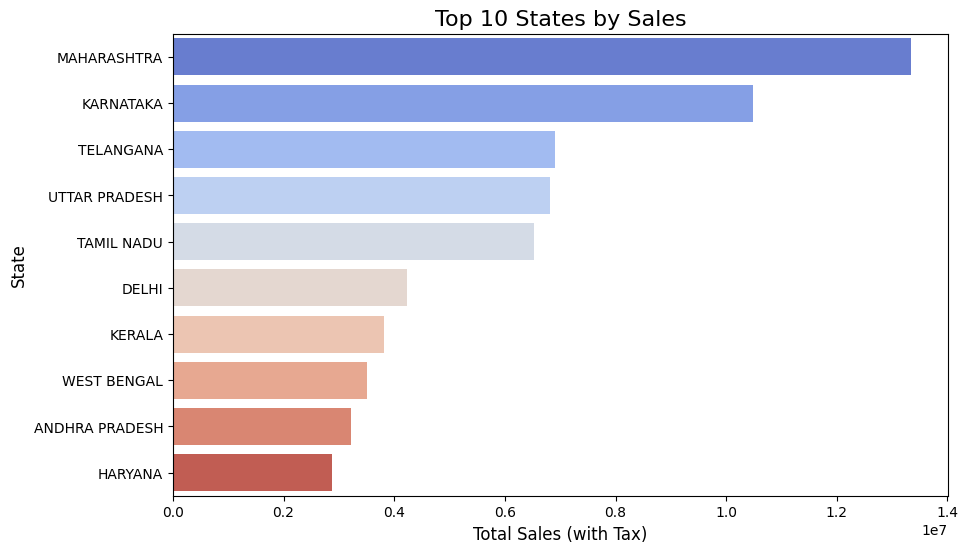

In [99]:
# Total sales by state
sales_by_state = data.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(10)

# Plot states
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_state.values, y=sales_by_state.index, palette="coolwarm")
plt.title("Top 10 States by Sales", fontsize=16)
plt.xlabel("Total Sales (with Tax)", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.show()


Analyze Order Status

Cancellation Rates

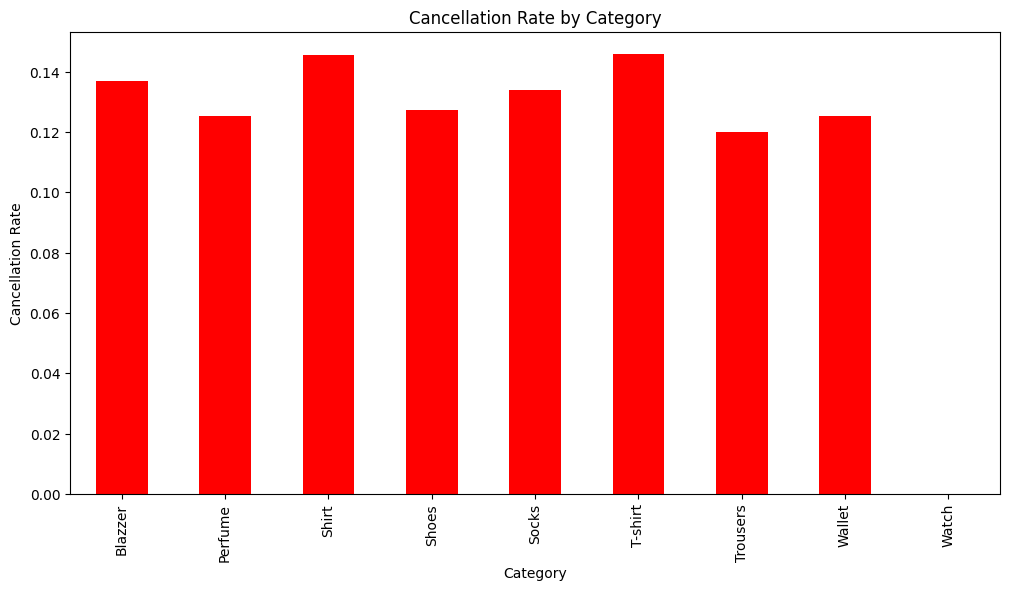

In [100]:
# Cancellation rate by category
cancel_rate = data[data['Status'] == 'Cancelled'].groupby('Category')['Order ID'].count() / data.groupby('Category')['Order ID'].count()

# Plot cancellation rates
plt.figure(figsize=(12, 6))
cancel_rate.plot(kind='bar', color='red', title='Cancellation Rate by Category')
plt.ylabel('Cancellation Rate')
plt.show()


ML for Predictive Analysis

Classification Model for Order Status

In [101]:
#Preprocess Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define features and target variable
X = data[['Category', 'Size', 'Fulfilment', 'Sales Channel', 'Qty', 'Amount']]
y = data['Status'].apply(lambda x: 1 if x == 'Cancelled' else 0)  # Binary classification: Cancelled=1, Fulfilled=0

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['Category', 'Size', 'Fulfilment', 'Sales Channel'], drop_first=True)

# Scale numerical variables
scaler = StandardScaler()
X[['Qty', 'Amount']] = scaler.fit_transform(X[['Qty', 'Amount']])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [102]:
#Train Classification Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_proba))


Accuracy: 0.9526283144673593
F1-Score: 0.8073770491803278
AUC-ROC: 0.8867899599346905
